In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly
import numpy as np

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [8]:
dataset = pd.read_csv('vgsales.csv')

In [9]:
df = pd.DataFrame(dataset)

In [10]:
df.set_index("Rank",inplace=True)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<AxesSubplot:ylabel='Rank'>

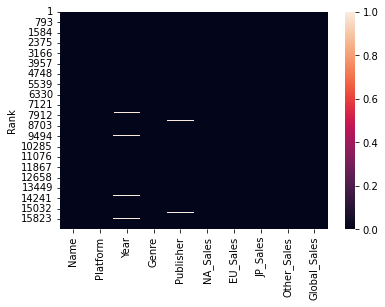

In [9]:
sb.heatmap(df.isnull())

In [10]:
df.shape

(16598, 10)

In [11]:
df.size

165980

In [12]:
16598*11

182578

In [13]:
for i in df.columns:
    percent = (df[i].isnull().sum()*100)/len(df)
    if percent>0:
        print("Missing Percentage in %s:%.3f%%"%(i,percent))

Missing Percentage in Year:1.633%
Missing Percentage in Publisher:0.349%


There is no more issue, no need to Calculate in the missing values or drop them

In [14]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
df['Publisher'].nunique()

578

In [16]:
df['Genre'].nunique()

12

([<matplotlib.patches.Wedge at 0x7f8d97ec6eb0>,
 [Text(0.890359059728065, 0.6459572313707436, 'Action'),
  Text(-0.14098088951152532, 1.0909282234833506, 'Sports'),
  Text(-0.8628261066951454, 0.6822984021711452, 'Misc'),
  Text(-1.0981313409109585, 0.06409023411644078, 'Role-Playing'),
  Text(-0.9800788430959432, -0.4994451534610361, 'Shooter'),
  Text(-0.6284777724368498, -0.9027821938611857, 'Adventure'),
  Text(-0.14077451297515953, -1.09095487372146, 'Racing'),
  Text(0.29952111976020795, -1.058436157176044, 'Platform'),
  Text(0.6279649450683688, -0.9031389858517243, 'Simulation'),
  Text(0.8832142054986449, -0.65569250964564, 'Fighting'),
  Text(1.033606467004216, -0.3763743766080029, 'Strategy'),
  Text(1.09333257635814, -0.12092922506190083, 'Puzzle')],
 [Text(0.4856503962153081, 0.35234030802040556, '19.978%'),
  Text(-0.07689866700628653, 0.5950517582636456, '14.134%'),
  Text(-0.4706324218337156, 0.3721627648206246, '10.477%'),
  Text(-0.5989807314059773, 0.0349583095180586

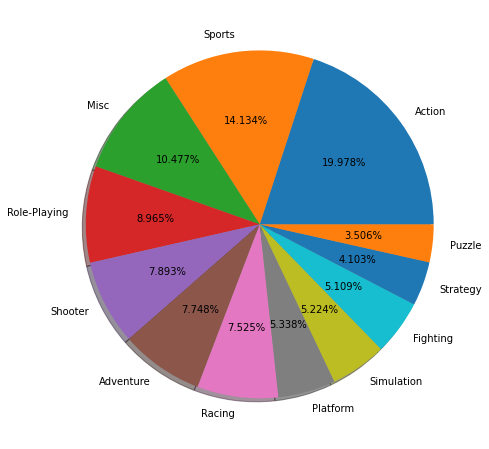

In [17]:
plt.figure(figsize=(8,8))
plt.pie(df['Genre'].value_counts(),labels=df['Genre'].value_counts().index,autopct="%.3f%%",shadow=True)

In [18]:
genre = df[df['Genre'].map(lambda row:'Sports' in row)]

In [19]:
(len(genre)*100)/len(df)

14.134233040125316

In [20]:
top5 = df['Publisher'].value_counts()[:5]

In [21]:
top5_df = df[df['Publisher'].map(lambda row:row in top5)]

<AxesSubplot:xlabel='count', ylabel='Publisher'>

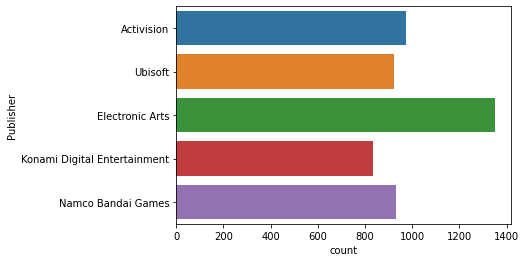

In [22]:
sb.countplot(y='Publisher',data=top5_df,orient='h')

In [23]:
electronics_arts_sale = df[df['Publisher']=="Electronic Arts"]

In [24]:
electronics_arts_sale.groupby('Publisher')

### Most Video Game Year Wise

In [25]:
df['Year'].dtype

dtype('float64')

In [26]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [27]:
df['Year'].isnull().sum()

271

In [29]:
df['Year'].fillna(df['Year'].mean(),inplace=True)

In [30]:
df['Year'].isnull().sum()

0

In [31]:
df['Year'].dtype

dtype('float64')

In [32]:
df['Year'].replace(2020,2009,inplace=True)

In [33]:
df['Year']

Rank
1        2006.0
2        1985.0
3        2008.0
4        2009.0
5        1996.0
          ...  
16596    2002.0
16597    2003.0
16598    2008.0
16599    2010.0
16600    2003.0
Name: Year, Length: 16598, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Count'>

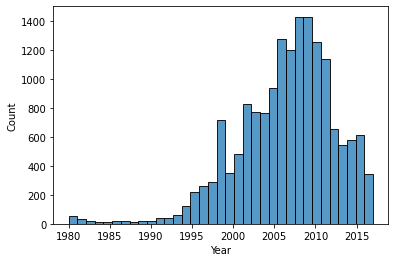

In [34]:
sb.histplot(df["Year"],kde=False,bins=35,palette="Dark2")

In [35]:
df['Year'].mean()

2006.4057805843054

In [36]:
df[df['Year']==2010].shape

(1259, 10)

In [37]:
df['Year'].median()

2007.0

In [38]:
sb.histplot?

Text(0, 0.5, 'Global Sales')

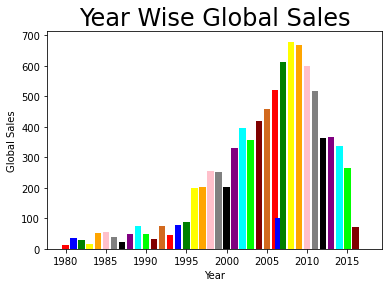

In [39]:
plt.title("Year Wise Global Sales",fontsize=24)
colours = ["red","blue","green","yellow","orange","pink","grey","black","purple","aqua","lime","maroon","chocolate"]
plt.bar(df['Year'].value_counts().sort_index().index,df.groupby("Year")['Global_Sales'].sum(),color=colours)
plt.xlabel("Year")
plt.ylabel("Global Sales")

In [40]:
df['Year'].value_counts().sort_index().index

Float64Index([            1980.0,             1981.0,             1982.0,
                          1983.0,             1984.0,             1985.0,
                          1986.0,             1987.0,             1988.0,
                          1989.0,             1990.0,             1991.0,
                          1992.0,             1993.0,             1994.0,
                          1995.0,             1996.0,             1997.0,
                          1998.0,             1999.0,             2000.0,
                          2001.0,             2002.0,             2003.0,
                          2004.0,             2005.0,             2006.0,
              2006.4064433147546,             2007.0,             2008.0,
                          2009.0,             2010.0,             2011.0,
                          2012.0,             2013.0,             2014.0,
                          2015.0,             2016.0,             2017.0],
             dtype='float64')

In [41]:
df.groupby("Year")["Global_Sales"].sum()

Year
1980.000000     11.38
1981.000000     35.77
1982.000000     28.86
1983.000000     16.79
1984.000000     50.36
1985.000000     53.94
1986.000000     37.07
1987.000000     21.74
1988.000000     47.22
1989.000000     73.45
1990.000000     49.39
1991.000000     32.23
1992.000000     76.16
1993.000000     45.98
1994.000000     79.17
1995.000000     88.11
1996.000000    199.15
1997.000000    200.98
1998.000000    256.47
1999.000000    251.27
2000.000000    201.56
2001.000000    331.47
2002.000000    395.52
2003.000000    357.85
2004.000000    419.31
2005.000000    459.94
2006.000000    521.04
2006.406443    100.08
2007.000000    611.13
2008.000000    678.90
2009.000000    667.59
2010.000000    600.45
2011.000000    515.99
2012.000000    363.54
2013.000000    368.11
2014.000000    337.05
2015.000000    264.44
2016.000000     70.93
2017.000000      0.05
Name: Global_Sales, dtype: float64

In [42]:
df[df['Year']==2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


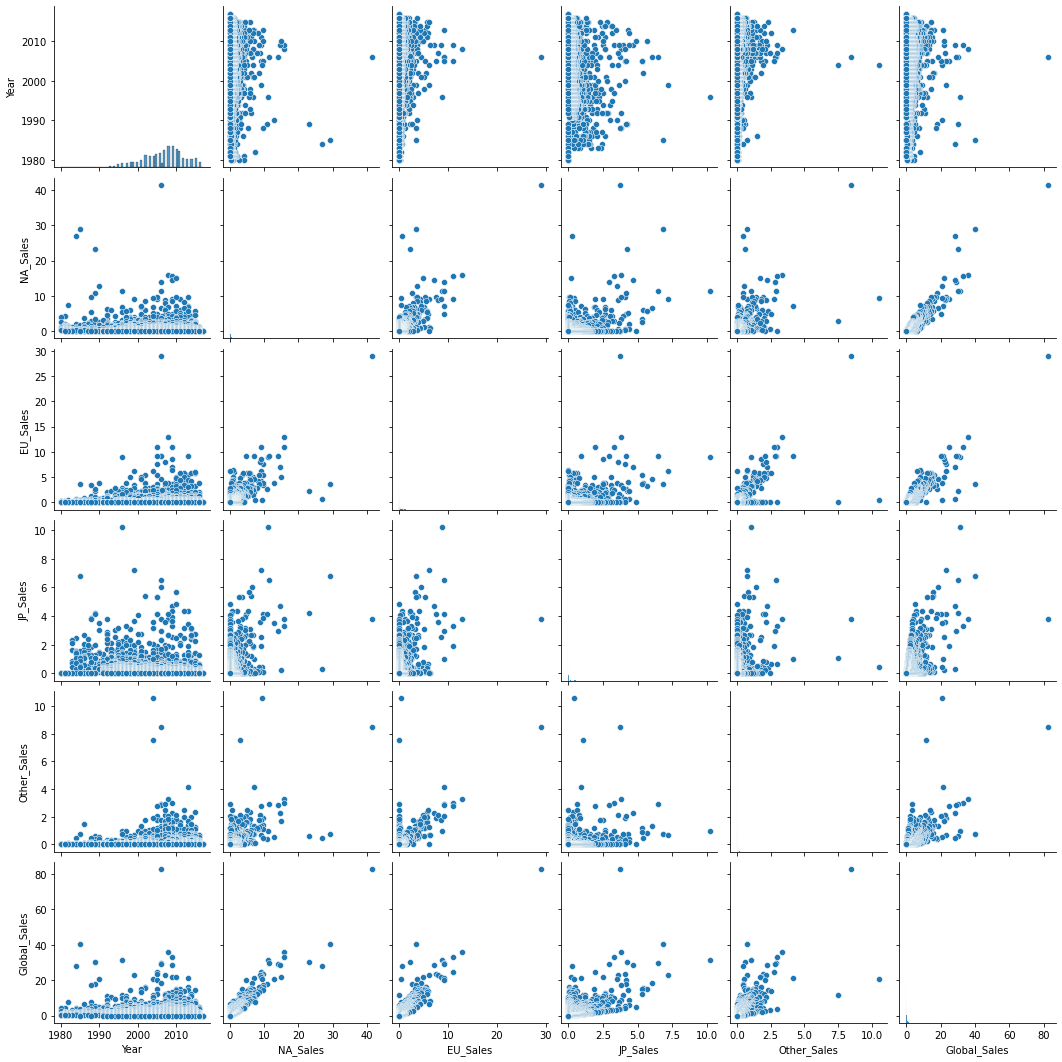

In [44]:
sb.pairplot(df)